## Practical Testing on the MNIST Dataset

In [6]:
import torch
import sys
import numpy as np
import matplotlib.pyplot as plt

from model import ImgClassifier
from utils import load_mnist

In [7]:
model_file = './result_model/mnist_classification_20241108_004825_bs64_epoch30_ratio0.8.pth'

In [8]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [9]:
def plot(x,y_hat):
    
    for i in range(x.size(0)):
        img = np.array(x[i].detach().cpu(),dtype='float').reshape(28,28)
        
        plt.imshow(img,cmap='gray')
        plt.show()
        print(f"Predict: {torch.argmax(y_hat[i],dim=-1)}")

In [29]:
def test(model,x,y,to_be_shown=True):
    
    model.eval()
    
    with torch.no_grad():
        
        y_hat = model(x) # |y_hat| = (bs, 10)
        
        correct_cnt = (y == torch.argmax(y_hat,dim=-1)).sum()
        total_cnt = x.size(0)
        acc = correct_cnt / total_cnt
        
        print(f"Test Accuracy: {acc:.4f}")
        
        if to_be_shown:
            plot(x,y_hat)
        

In [30]:
def load(fn,device):
    d = torch.load(fn,map_location=device)
    
    return d['model']

In [31]:
x, y = load_mnist(is_train=False)

print(x.shape) # (10000, 784)
print(y.shape) # (10000)

x, y = x.to(device),y.to(device)

model = ImgClassifier(784,10).to(device)
model.load_state_dict(load(fn=model_file,device=device))


mnist size of X:torch.Size([10000, 28, 28])
mnist size of Y:torch.Size([10000, 28, 28])
torch.Size([10000, 784])
torch.Size([10000])


/var/folders/rn/7s4510t94j703wxxn5gjx2lc0000gn/T/ipykernel_6408/3426465661.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(fn,map_location=device)


<All keys matched successfully>

In [34]:
test(model=model,x=x,y=y,to_be_shown=False)

Test Accuracy: 0.9850


Test Accuracy: 1.0000


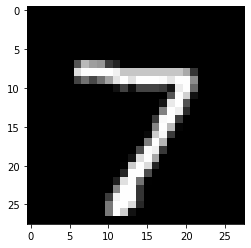

Predict: 7


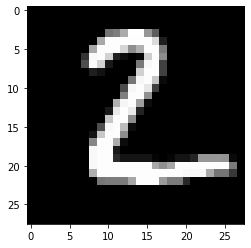

Predict: 2


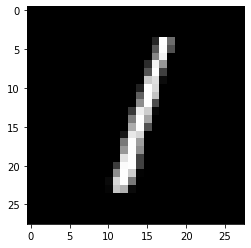

Predict: 1


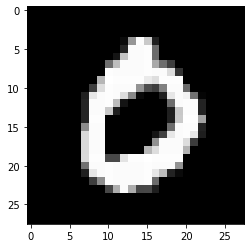

Predict: 0


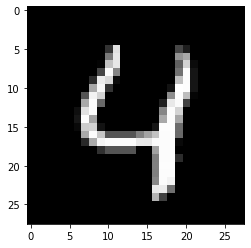

Predict: 4


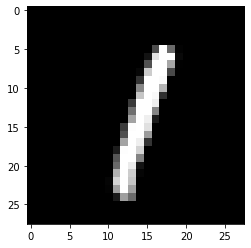

Predict: 1


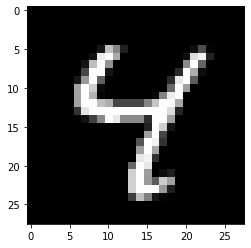

Predict: 4


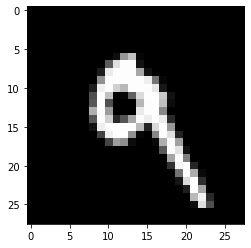

Predict: 9


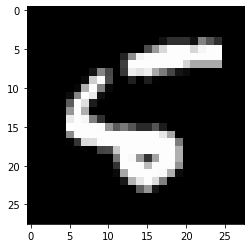

Predict: 5


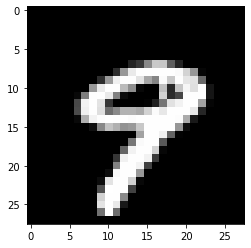

Predict: 9


In [35]:
test(model=model,x=x[:10],y=y[:10],to_be_shown=True)